Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr()

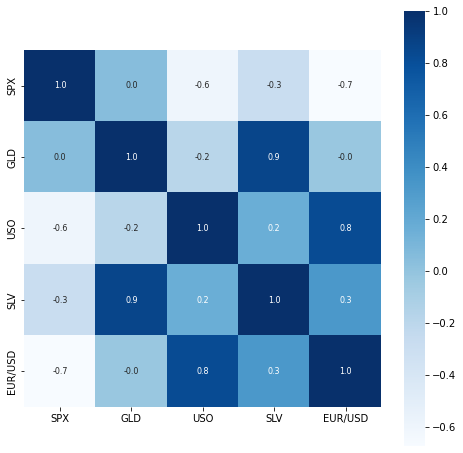

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


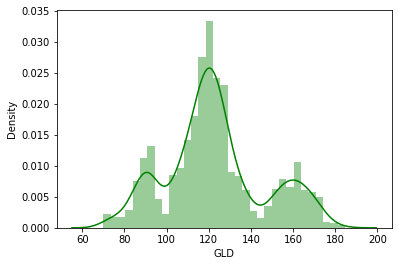

In [12]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [13]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.8024997   81.76539994 116.12460019 127.62850073 120.48470156
 154.66519818 150.24759836 125.84670103 117.63599858 126.1703004
 116.85650075 172.02970087 141.59679814 167.85919873 115.10210022
 117.82960026 138.57680361 169.86320092 159.40210318 161.05689992
 154.91850014 125.44000014 175.49340004 157.50830401 125.1320003
  93.66869953  78.02370047 120.52970031 119.13349971 167.45739924
  88.04280098 125.24589994  91.14940071 117.66750035 121.2089994
 135.98950078 115.694701   115.04590048 146.44709943 106.99790111
 104.82810278  87.04569765 126.48040045 118.10090015 152.68889877
 119.61880008 108.28900029 108.03599864  93.27370055 127.08999789
  75.02340024 113.68889914 121.17329996 111.22789913 118.92419886
 120.5121995  160.02059918 168.33770156 147.09079678  85.83389886
  94.36280034  86.79519902  90.50050024 119.04540061 126.49490095
 127.72149976 171.15230023 122.4069992  117.51719915  98.86540018
 167.9912021  143.15119877 132.31180264 121.23400213 121.05899936
 119.94710073

In [21]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9897511997931183


Compare the Actual Values and Predicted Values in a Plot

In [22]:
Y_test = list(Y_test)

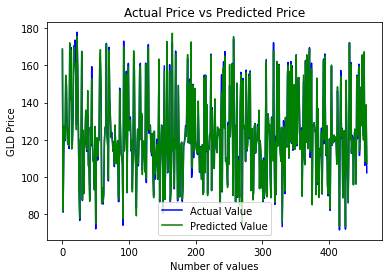

In [23]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [24]:
# Decision Tree

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [31]:
# predicting a new value
  
# test the output 
y_pred = regressor.predict(X_test)
y_pred

array([168.970001,  86.089996, 114.769997, 127.550003, 121.730003,
       155.669998, 149.149994, 126.809998, 117.389999, 125.620003,
       117.959999, 174.580002, 141.919998, 167.179993, 115.839996,
       116.730003, 134.100006, 168.5     , 159.570007, 138.220001,
       155.360001, 126.610001, 177.210007, 157.339996, 125.459999,
        93.720001,  73.080002, 122.290001, 119.220001, 167.990005,
        87.370003, 124.769997,  91.730003, 117.919998, 121.300003,
       135.410004, 114.57    , 115.800003, 134.119995, 105.720001,
       104.370003,  87.239998, 127.489998, 118.360001, 157.779999,
       119.959999, 108.419998, 107.839996,  93.459999, 128.539993,
        72.510002, 113.260002, 120.110001, 109.860001, 118.919998,
       120.730003, 161.320007, 161.520004, 146.869995,  85.199997,
        93.040001,  86.879997,  90.949997, 119.800003, 126.139999,
       127.400002, 173.490005, 122.970001, 116.209999,  97.550003,
       170.130005, 142.050003, 132.490005, 120.910004, 122.879

In [33]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)

print("R squared error : ", error_score)

R squared error :  0.9897511997931183


In [34]:
regressor.score(X_test, Y_test)

0.9854190298916252